# Preamble

In [1]:
import numpy as np
import random
import math
import networkx as nx
import matplotlib.pyplot as plt
import os
import time

In [2]:
# Define the subdirectory name for storing figures
fig_subdirectory = "Figures"
if not os.path.exists(fig_subdirectory):    # Check if the subdirectory exists
    os.makedirs(fig_subdirectory)
    
# For writing data
data_subdirectory = "Data"
if not os.path.exists(data_subdirectory):
    os.makedirs(data_subdirectory)

# Loading dependencies

In [3]:
%run ./Generate_Network_Topology.ipynb

%run ./Generating_CRs.ipynb 

%run ./Links.ipynb

# Given

In [4]:
# 21 Edges in NSFNET
edges = [ (1, 2, 1100),  #Edge between Node 0 and Node 1
             (2, 3, 1600), #Intermediate Edge between Node 1 and Node 2
             (1, 3, 600), # Edge between Node 0 and Node 2
             (2, 8, 1500), # Edge between Node 1 and Node 7
             (1, 4, 1000),  # Edge between Node 0 and Node 3
             
         (4, 5, 600), # Edge between Node 3 and Node 4
             (5, 7, 800), # Intermediate edge between Node 4 and Node 6
             (7, 8, 700), # Intermediate edge between Node 6 and Node 7
             (10, 11, 900), # Edge Betweeen Node 9 and Node 10
             (4, 9, 1500), # Edge Betweeen Node 3 and Node 8
         
         (9, 12, 800), # Edge Betweeen Node 8 and Node 11
             (8, 10, 700), # Edge Betweeen Node 7 and Node 9
             (10, 12, 500), # Edge Betweeen Node 9 and Node 11
             (9, 14, 800), # Edge Betweeen Node 8 and Node 13
             (10, 14, 500), # Edge Betweeen Node 9 and Node 13
         
         (12, 13, 300), # Edge Betweeen Node 11 and Node 12
             (13, 14, 300), # Edge Betweeen Node 12 and Node 13
             (3, 6, 1000), # Edge Betweeen Node 2 and Node 5
             (6, 5, 1100), # Edge Betweeen Node 5 and Node 4
             (6, 13, 2000), # Edge Betweeen Node 5 and Node 12
         
         (6, 11, 1200), # Edge Betweeen Node 5 and Node 10
        ]

# Execution

Number of Nodes:  14
Number of Links : 21


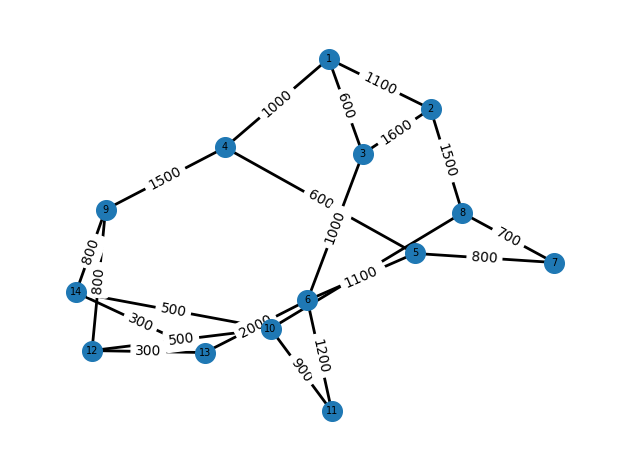

Running QKRA-SSL for numCR = 600 with j_range = 13(factor = 25), k = 10, iterations = 10

All CRs for X = 600 dealt with :
The Success rate of connection requests(SRCR) is : 0.44166666666666665
The NSP of the network is : 1033
The time-slot utilization ratio(TUR) is :  [0.8825396825396825, 0.9404761904761905, 0.8857142857142857, 0.8412698412698413]

All CRs for X = 625 dealt with :
The Success rate of connection requests(SRCR) is : 0.4464
The NSP of the network is : 1084
The time-slot utilization ratio(TUR) is :  [0.9142857142857143, 0.9404761904761905, 0.9285714285714286, 0.8849206349206349]

All CRs for X = 650 dealt with :
The Success rate of connection requests(SRCR) is : 0.4276923076923077
The NSP of the network is : 1100
The time-slot utilization ratio(TUR) is :  [0.919047619047619, 0.9702380952380952, 0.9238095238095239, 0.8809523809523809]

All CRs for X = 675 dealt with :
The Success rate of connection requests(SRCR) is : 0.4103703703703704
The NSP of the network is : 1077
The

In [5]:
#%%capture
start_time = time.time()

# Creates the nsfnet topology
g_nsfnet = create_topology(edges) 
numNodes = len(g_nsfnet)

# Set the ASLC
aslc = "SSL"

# Open the file to write data to
filename = "QKRA-" + aslc + ".txt"
data_path = os.path.join(data_subdirectory, filename)
file = open(data_path, "a")

# Modify : numCR, k, num_iter, j_range, factor
numCR = 600
k = 10    # K sp
num_iter = 10    # Average over
j_range = 13    # X steps
#factor = int(input("Input the multiplication factor"))
factor = 25    # Step multiplication factor. 10 if X>=100

# Initializing the arrays to store data of j_range X for num_iter
srcr = np.zeros([num_iter, j_range])
tur = np.zeros([num_iter, j_range])
nsp = np.zeros([num_iter, j_range]).astype(int)
x = np.zeros([num_iter, j_range]).astype(int)

file.write(f"\n\nQKRA-{aslc}: k = {k}, Averaged over(z) = {num_iter} : \n")

print(f"Running QKRA-{aslc} for numCR = {numCR} with j_range = {j_range}(factor = {factor}), k = {k}, iterations = {num_iter}") 

for z in range(num_iter):    # Loop to average over the same list of X
    
    X = numCR   
    #X = int(input("Input the number of CRs to be generates"))
    
    j = 0    
    %run ./QKRA.ipynb
    #print("#########################################################################################################################################")
    print(f"\nIteration {z+1} complete")
    print("#########################################################################################################################################\n")
##
 
print("Simulation Ended")

end_time = time.time()
elapsed_time_hrs = round((end_time - start_time)/3600, 4)

In [7]:
print("Start time : ", start_time)
print("End time : ", end_time)
print(f"Elapsed Time : {elapsed_time_hrs : .2f} Hrs")

Start time :  1708073379.0287583
End time :  1708074669.4014697
Elapsed Time :  0.36 Hrs


In [8]:
# Initializing arrays to calculate the averages
avg_srcr = np.zeros(j_range)
avg_tur = np.zeros(j_range)
avg_nsp = np.zeros(j_range)
avg_x = np.zeros(j_range)

for j in range((j_range)):
    for i in range(num_iter):    # Summing over num_iter
        avg_srcr[j] += srcr[i, j] 
        avg_tur[j] += tur[i, j] 
        avg_nsp[j] += nsp[i, j] 
        avg_x[j] += x[i, j] 

avg_srcr /= num_iter
avg_tur /= num_iter 
avg_nsp /= num_iter
avg_x /= num_iter 

file.write(f"\nX range : {avg_x} \nAverage SRCR : {avg_srcr} \nAverage TUR : {avg_tur} \nElapsed Time : {elapsed_time_hrs} Hrs")
file.close()

# Display Data

In [9]:
print(f"Average SRCR : {avg_srcr}, \nAverage TUR : {avg_tur}, \nAverage NSP : {avg_nsp}, \nX : {avg_x}")

Average SRCR : [0.4585     0.44592    0.42076923 0.42       0.40857143 0.39958621
 0.38946667 0.37612903 0.367      0.36024242 0.34741176 0.34011429
 0.32977778], 
Average TUR : [0.89698413 0.90555556 0.90190476 0.90285714 0.91809524 0.91603175
 0.92126984 0.92746032 0.92587302 0.94111111 0.93285714 0.93666667
 0.94333333], 
Average NSP : [1071.2 1085.8 1065.7 1103.6 1113.6 1126.9 1138.2 1136.6 1140.2 1153.9
 1147.5 1157.7 1152. ], 
X : [600. 625. 650. 675. 700. 725. 750. 775. 800. 825. 850. 875. 900.]


# Plotting

Plot 1 : SRCR and TUR

Plot2 : NSP

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


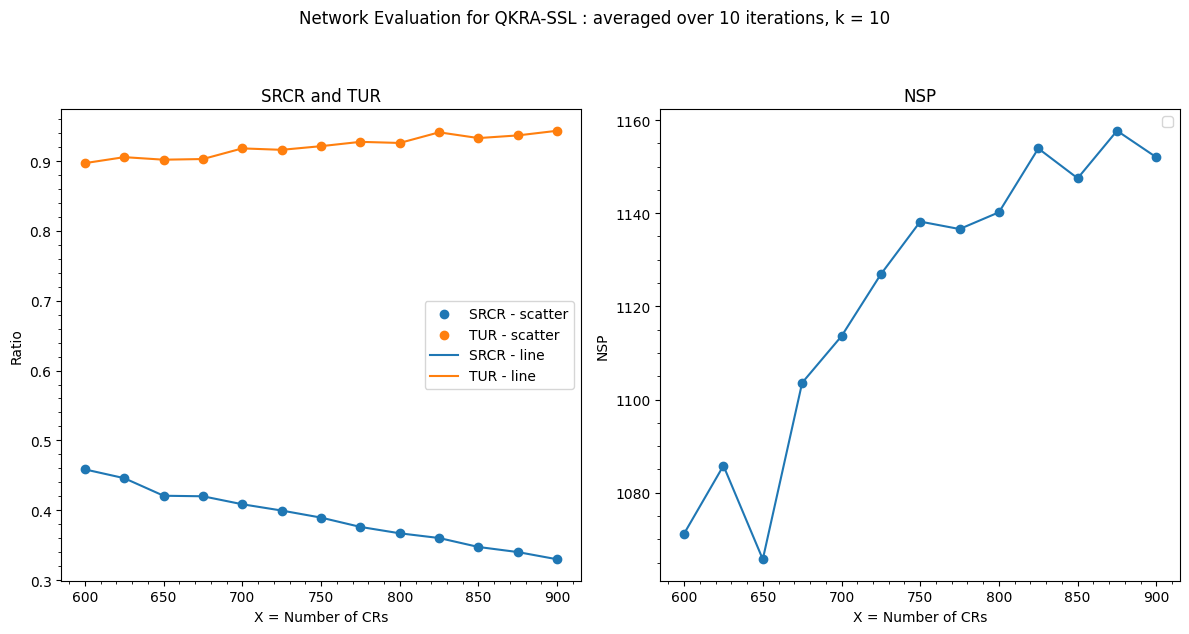

SSL - z = 10, k = 10 for X - 600.0 to 900.0.jpeg


In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

ax1.scatter(avg_x, avg_srcr, label='SRCR - scatter') 
ax1.scatter(avg_x, avg_tur, label='TUR - scatter')
ax2.scatter(avg_x, avg_nsp)

ax1.plot(avg_x, avg_srcr, label='SRCR - line')
ax1.plot(avg_x, avg_tur, label='TUR - line')
ax2.plot(avg_x, avg_nsp)


ax1.set_xlabel('X = Number of CRs')
ax1.set_ylabel('Ratio')
ax1.set_title("SRCR and TUR")
ax1.minorticks_on()
ax1.legend(loc='best')

ax2.set_xlabel('X = Number of CRs')
ax2.set_ylabel('NSP')
ax2.set_title("NSP")
ax2.minorticks_on()
ax2.legend(loc='best')

fig.suptitle(f"Network Evaluation for QKRA-{aslc} : averaged over {num_iter} iterations, k = {k}", y=1.05)  # Place title above subplots
#fig.legend(loc='best')

# Show the plot
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


# Saving the plot
filename = (f"{aslc} - z = {num_iter}, k = {k} for X - {str(avg_x[0])} to {str(avg_x[-1])}.jpeg")
print(filename)

# Combine the subdirectory and filename to create the full path
fig_path = os.path.join(fig_subdirectory, filename)
#plt.savefig(fig_path, dpi=300, bbox_inches='tight')